In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Text(0.5,1,'$s^i_t = s^i_{t-1} + N(0, 0.2)$')

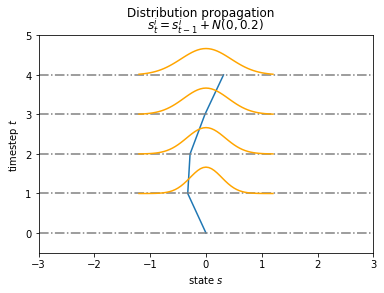

In [13]:
noise = 0.2


s_t = [0.0]
ts = np.arange(5)
for t in range(1, 5):
    s_prev = s_t[-1]
    s_new = s_prev + noise * np.random.randn()
    s_t.append(s_new)


# plt.xkcd(scale=1, length=100, randomness=2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot gaussian
x_axis = np.arange(-6*noise, 6*noise, 0.05)
pdf = norm.pdf(x_axis, 0, noise)
pdf /= np.max(pdf) 
pdf /= 2
full_dist = pdf

ax.plot(s_t, ts)
plt.xlim(-3, 3)
plt.ylim(-0.5, 5.0)

for t in range(5):
    plt.axhline(ts[t], c='gray', ls='-.')
    if t > 0:
#         plt.plot(s_t[t-1]+x_axis, ts[t] + pdf)
        new_dist = np.zeros(x_axis.shape)
        for x, d in zip(x_axis, full_dist):
            new_dist += d*norm.pdf(x_axis, x, noise)
        new_dist /= 3/2*np.max(new_dist)
        plt.plot(x_axis, t+new_dist, c='orange')
        full_dist = np.copy(new_dist)
            
    
# plt.axis('off')
plt.xlabel('state $s$')
plt.ylabel('timestep $t$')
plt.suptitle('Distribution propagation')
plt.title('$s^i_t = s^i_{t-1} + N(0, 0.2)$')


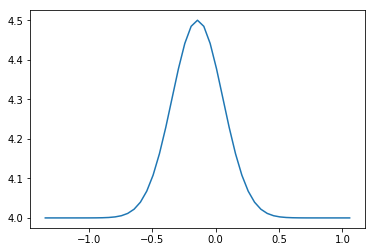

In [4]:
a = plt.plot(s_t[t-1]+x_axis, ts[t] + pdf)

Text(0.5,1,'$s^i_t = s^i_{t-1} + N(0, 0.2)$')

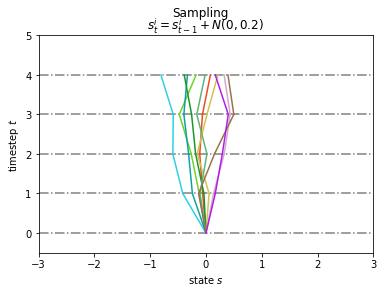

In [55]:
noise = 0.2

s_t = [0.0]

# plt.xkcd(scale=1, length=100, randomness=2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.xlim(-3, 3)
plt.ylim(-0.5, 5.0)

for t in range(5):
    plt.axhline(t, c='gray', ls='-.')
    
for _ in range(10):
    s_t = [0.0]
    color = np.random.rand(3,)
    for t in range(4):
        s_prev = s_t[-1]
        s_new = s_prev + noise * np.random.randn()
        s_t.append(s_new)
        ax.plot(s_t[-2:], range(t, t+len(s_t[-2:])), c=color)
            
    
# plt.axis('off')
plt.xlabel('state $s$')
plt.ylabel('timestep $t$')
plt.suptitle('Sampling')
plt.title('$s^i_t = s^i_{t-1} + N(0, 0.2)$')

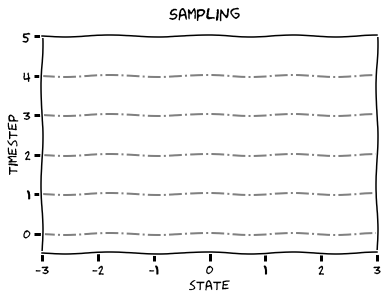

In [119]:
N = 10
T = 5
i = 0
j = 0

plt.xkcd(scale=1, length=100, randomness=2)
fig, ax = plt.subplots()

ax.set_xlabel('state')
plt.suptitle('Sampling')
ax.set_ylabel('timestep')
# plt.title('Sampling')


all_plots = [plt.plot([], [], c=np.random.rand(3,), animated=True) for _ in range(N)]

# ln,  = plt.plot([], [], c=np.random.rand(3,), animated=True)


xdata, ydata = [], []

def init():
    for t in range(5):
        ax.axhline(t, c='gray', ls='-.')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 5.0)
    return ln,

def update(frame):
    global xdata, ydata
    ln,  = all_plots[frame//T]
    
    if frame % T == 0:
        xdata = [0]
        ydata = [0]
    else:
        xdata.append(xdata[-1] + noise * np.random.randn())
        ydata.append(frame%T)
        
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(N*T),
                    init_func=init, blit=True)
plt.show()

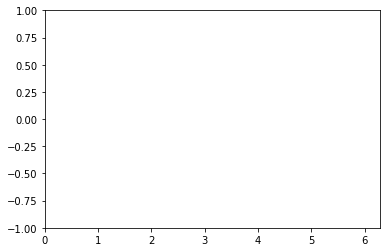

In [47]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 5.0)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [120]:
HTML(ani.to_html5_video())

In [50]:
ln